In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import bokeh
import altair as alt
import ggplot as gg
import folium


In [2]:
# Load the dataset
cricketers_df = pd.read_csv('/kaggle/input/international-cricket-players-dataset/cricketers.csv')

# Display the first few rows of the dataset
cricketers_df.head()


,Unnamed: 0.1,Unnamed: 0,Name,Date_Of_Birth,Country,Test,ODI,T20
0,0,2,Aaftab Alam Khan,31/01/1986,Malta,NaN,NaN,27.0
1,1,3,Aamer Hameed,18/10/1954,Pakistan,NaN,2.0,NaN
2,2,4,Aamer Hanif,04/10/1971,Pakistan,NaN,5.0,NaN
3,3,5,Aamer Ikram,07/07/1979,Portugal,NaN,NaN,4.0
4,4,6,Aamer Jamal,05/07/1996,Pakistan,2.0,NaN,4.0


In [3]:
# Check for missing values in the dataset
missing_values = cricketers_df.isnull().sum()

# Display the count of missing values for each column
print(missing_values)

Unnamed: 0.1        0
Unnamed: 0          0
Name                0
Date_Of_Birth      69
Country             0
Test             3665
ODI              3899
T20              3095
dtype: int64


In [4]:
# Fill missing values with appropriate methods (e.g., mean, median, mode)
cricketers_df['Test'].fillna(cricketers_df['Test'].mean(), inplace=True)
cricketers_df['ODI'].fillna(cricketers_df['ODI'].median(), inplace=True)
cricketers_df['T20'].fillna(cricketers_df['T20'].mode()[0], inplace=True)

# Verify that missing values have been handled
print(cricketers_df.isnull().sum())

Unnamed: 0.1      0
Unnamed: 0        0
Name              0
Date_Of_Birth    69
Country           0
Test              0
ODI               0
T20               0
dtype: int64


In [5]:
cricketers_df.describe()

,Unnamed: 0.1,Unnamed: 0,Test,ODI,T20
count,6810.000000,6810.000000,6810.000000,6810.000000,6810.000000
mean,3415.190896,3427.881791,17.634658,22.703671,8.280176
std,1973.024850,1980.027997,17.261720,38.762128,14.875098
min,0.000000,2.000000,1.000000,1.000000,1.000000
25%,1706.250000,1712.250000,9.000000,13.000000,1.000000
50%,3416.500000,3430.500000,17.634658,13.000000,1.000000
75%,5123.750000,5142.750000,17.634658,13.000000,9.000000
max,6834.000000,6861.000000,200.000000,463.000000,148.000000


**How to visualize the distribution of Test, ODI, and T20 scores?**

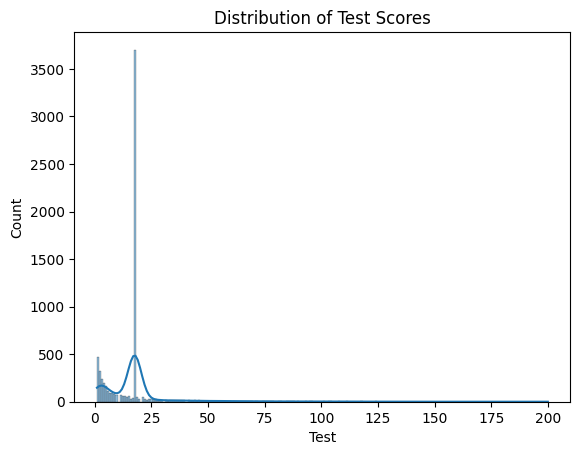

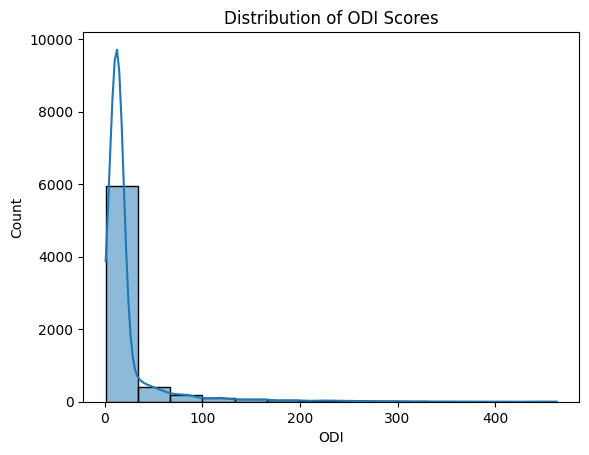

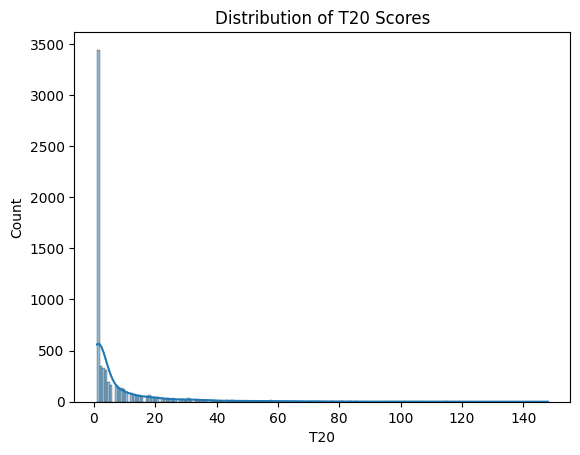

In [6]:
# Plot distribution of Test scores
sns.histplot(cricketers_df['Test'], kde=True)
plt.title('Distribution of Test Scores')
plt.show()

# Plot distribution of ODI scores
sns.histplot(cricketers_df['ODI'], kde=True)
plt.title('Distribution of ODI Scores')
plt.show()

# Plot distribution of T20 scores
sns.histplot(cricketers_df['T20'], kde=True)
plt.title('Distribution of T20 Scores')
plt.show()


**How to create a correlation matrix for Test, ODI, and T20 scores?**

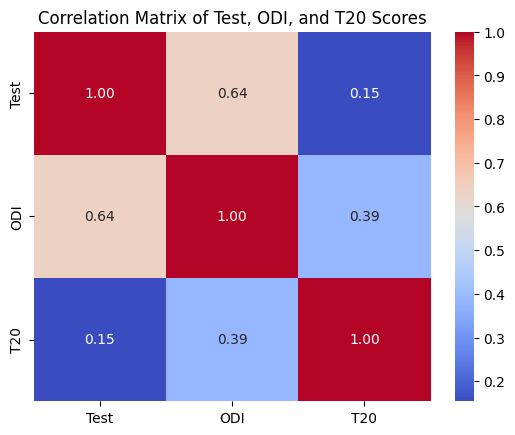

In [7]:
# Create a correlation matrix
correlation_matrix = cricketers_df[['Test', 'ODI', 'T20']].corr()

# Visualize the correlation matrix using a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Test, ODI, and T20 Scores')
plt.show()


**How to visualize the distribution of players across different countries?**

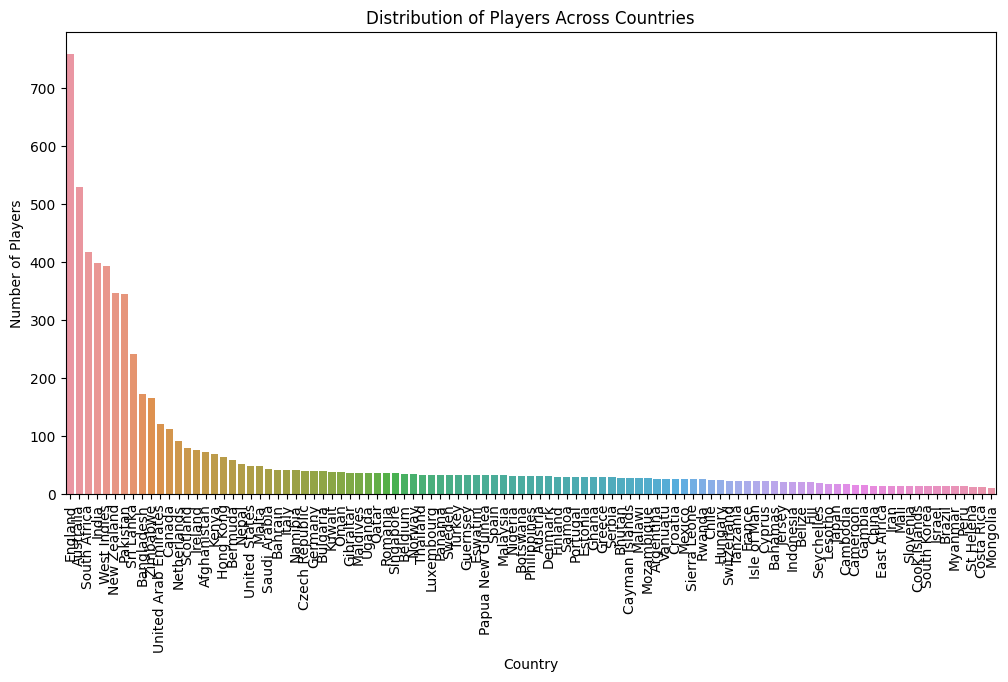

In [8]:
# Count the number of players from each country
country_counts = cricketers_df['Country'].value_counts()

# Plot a bar chart for the distribution of players across countries
plt.figure(figsize=(12, 6))
sns.barplot(x=country_counts.index, y=country_counts.values)
plt.xticks(rotation=90)
plt.title('Distribution of Players Across Countries')
plt.xlabel('Country')
plt.ylabel('Number of Players')
plt.show()


**How to create a scatter plot to compare Test and ODI scores?**

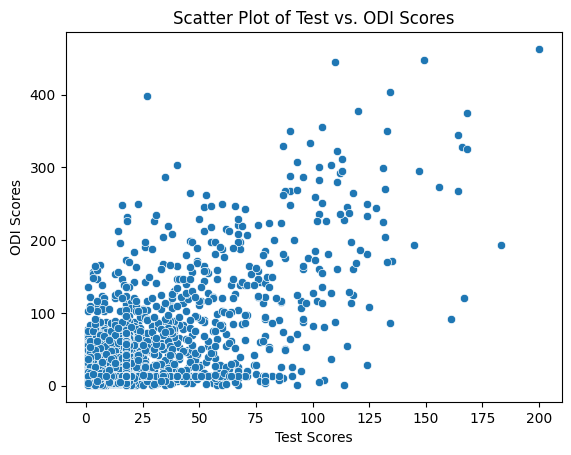

In [9]:
# Create a scatter plot for Test vs. ODI scores
sns.scatterplot(x='Test', y='ODI', data=cricketers_df)
plt.title('Scatter Plot of Test vs. ODI Scores')
plt.xlabel('Test Scores')
plt.ylabel('ODI Scores')
plt.show()


**How to create an interactive scatter plot for T20 scores?**

In [10]:
# Create an interactive scatter plot for T20 scores using Plotly Express
fig = px.scatter(cricketers_df, x='T20', hover_data=['Name', 'Country'], title='Interactive Scatter Plot of T20 Scores')
fig.update_layout(xaxis_title='T20 Scores', yaxis_title='Player')
fig.show()


**How to visualize the distribution of Test, ODI, and T20 scores by country?**

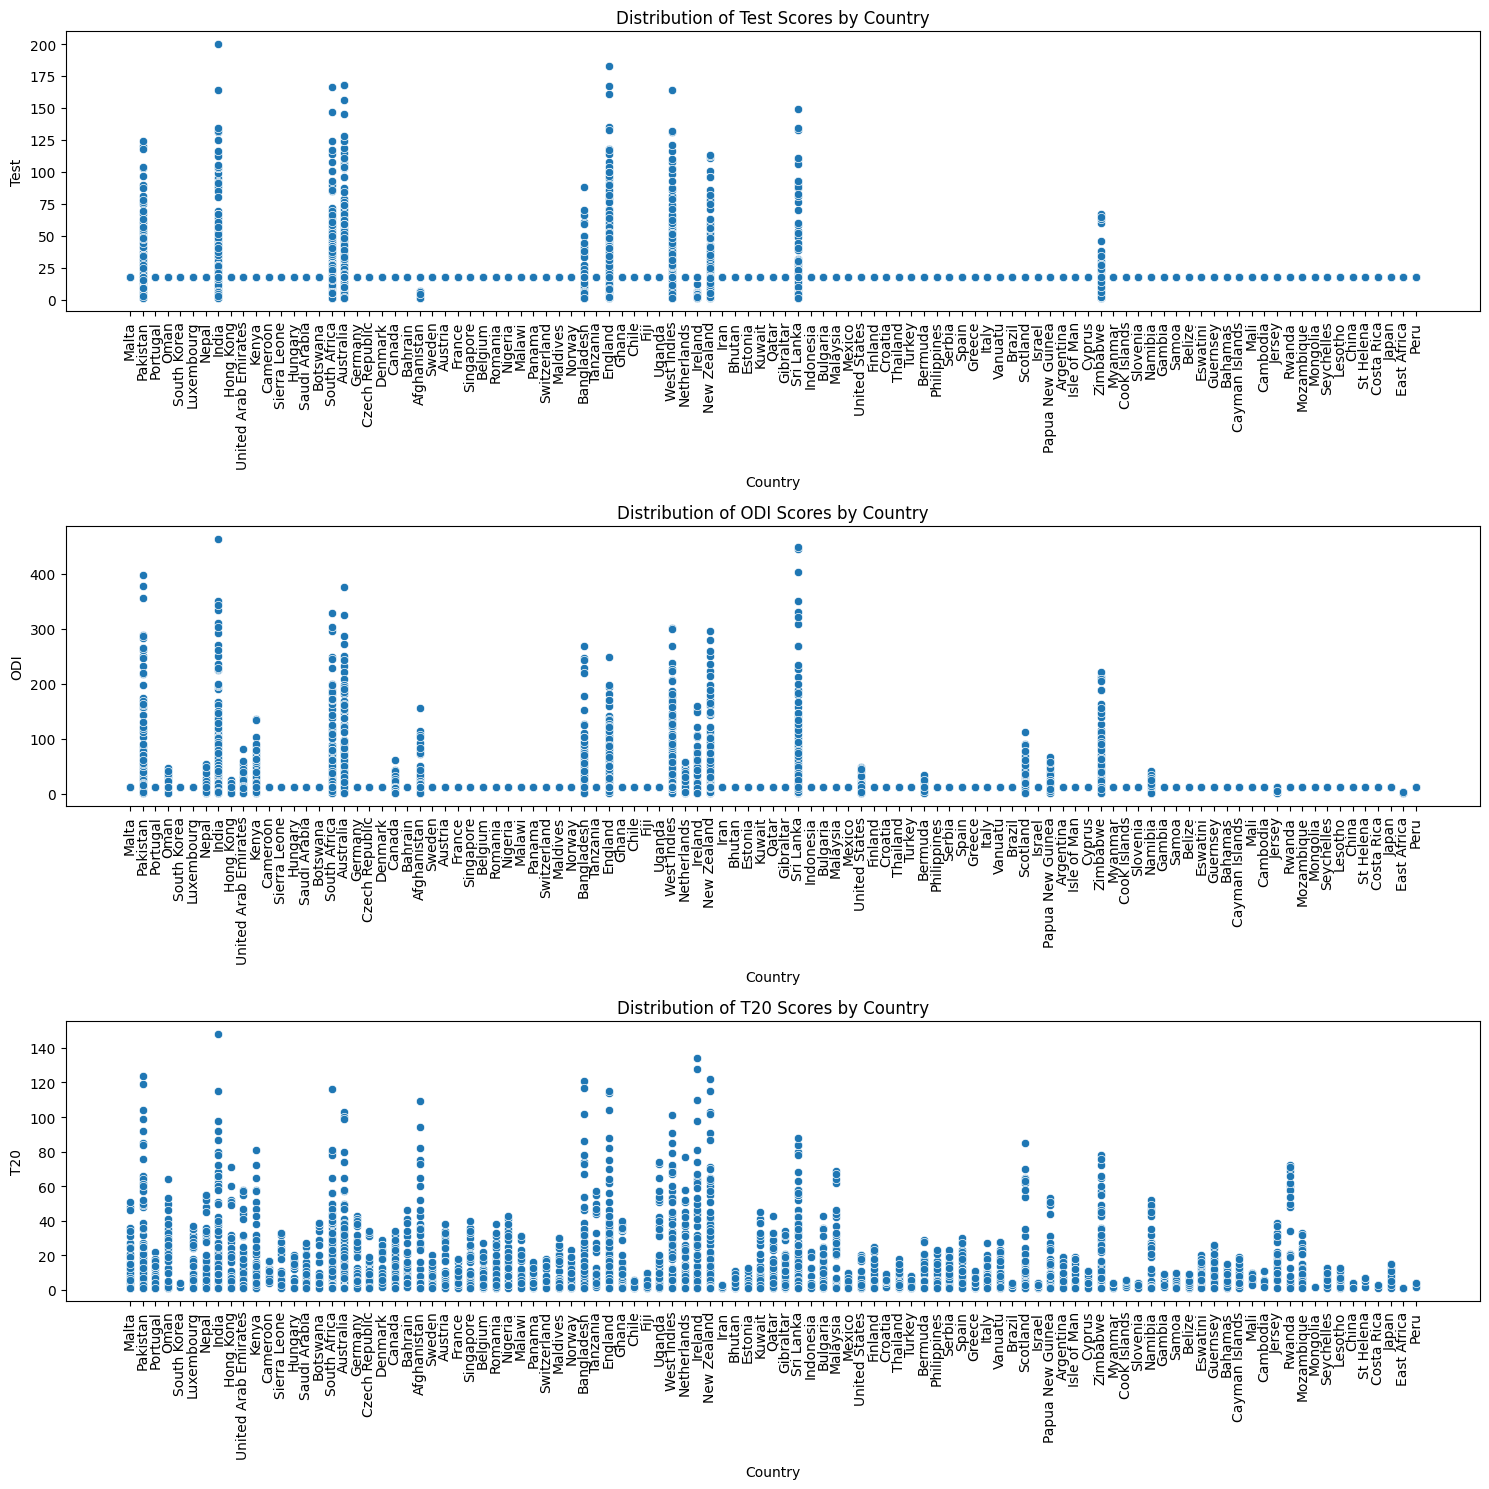

In [11]:
# Create subplots for Test, ODI, and T20 scores by country
plt.figure(figsize=(15, 15))

# Test scores
plt.subplot(3, 1, 1)
sns.scatterplot(x='Country', y='Test', data=cricketers_df)
plt.title('Distribution of Test Scores by Country')
plt.xticks(rotation=90)  # Rotate x-axis labels

# ODI scores
plt.subplot(3, 1, 2)
sns.scatterplot(x='Country', y='ODI', data=cricketers_df)
plt.title('Distribution of ODI Scores by Country')
plt.xticks(rotation=90)  # Rotate x-axis labels

# T20 scores
plt.subplot(3, 1, 3)
sns.scatterplot(x='Country', y='T20', data=cricketers_df)
plt.title('Distribution of T20 Scores by Country')
plt.xticks(rotation=90)  # Rotate x-axis labels

plt.tight_layout()
plt.show()


**How to visualize the top 10 countries with the highest average Test scores?**

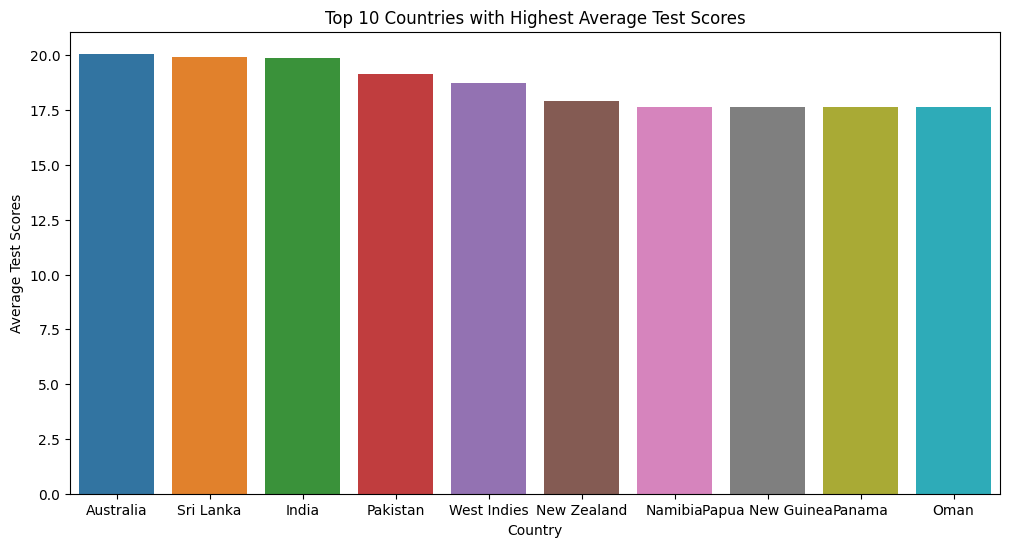

In [12]:
# Group by Country and calculate the average Test scores
average_test_scores_by_country = cricketers_df.groupby('Country')['Test'].mean().reset_index()

# Sort and select the top 10 countries
top_10_countries = average_test_scores_by_country.sort_values(by='Test', ascending=False).head(10)

# Plot a bar chart for the top 10 countries with the highest average Test scores
plt.figure(figsize=(12, 6))
sns.barplot(x='Country', y='Test', data=top_10_countries)
plt.title('Top 10 Countries with Highest Average Test Scores')
plt.xlabel('Country')
plt.ylabel('Average Test Scores')
plt.show()


**How to create an interactive bubble chart for ODI scores?**

In [13]:
# Create an interactive bubble chart for ODI scores using Plotly Express
fig = px.scatter(cricketers_df, x='ODI', y='Country', size='ODI', hover_data=['Name'], title='Interactive Bubble Chart of ODI Scores')
fig.update_layout(xaxis_title='ODI Scores', yaxis_title='Country')
fig.show()


**How to create a scatter plot matrix to visualize relationships between Test, ODI, and T20 scores?**

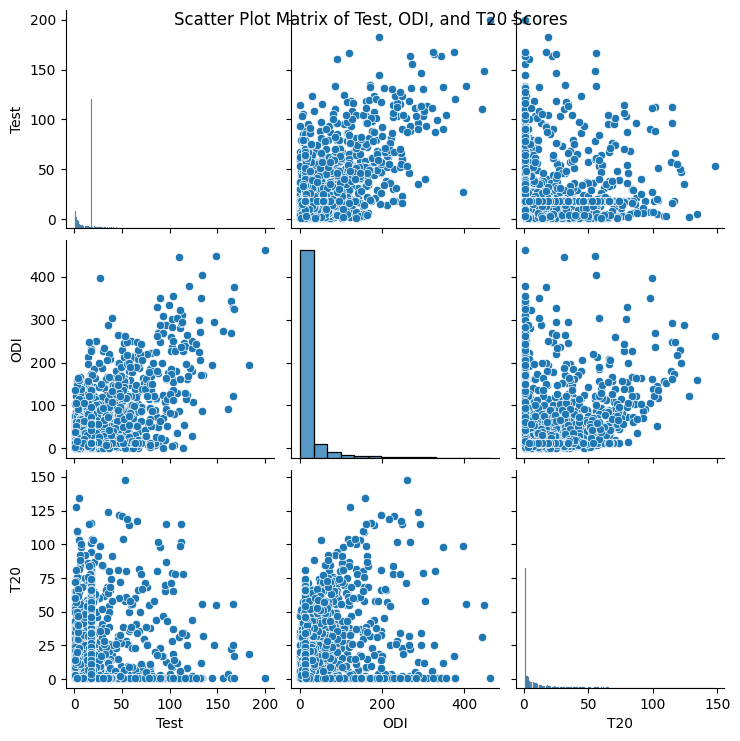

In [14]:
# Create a scatter plot matrix for Test, ODI, and T20 scores
sns.pairplot(cricketers_df[['Test', 'ODI', 'T20']])
plt.suptitle('Scatter Plot Matrix of Test, ODI, and T20 Scores')
plt.show()


**How to create an interactive scatter plot for Test and ODI scores?**

In [15]:
# Create an interactive scatter plot for Test and ODI scores using Plotly Express
fig = px.scatter(cricketers_df, x='Test', y='ODI', color='Country', hover_data=['Name'], title='Interactive Scatter Plot of Test and ODI Scores')
fig.update_layout(xaxis_title='Test Scores', yaxis_title='ODI Scores')
fig.show()


**Can we visualize the distribution of Test, ODI, and T20 scores using a kernel density estimate (KDE) plot?**

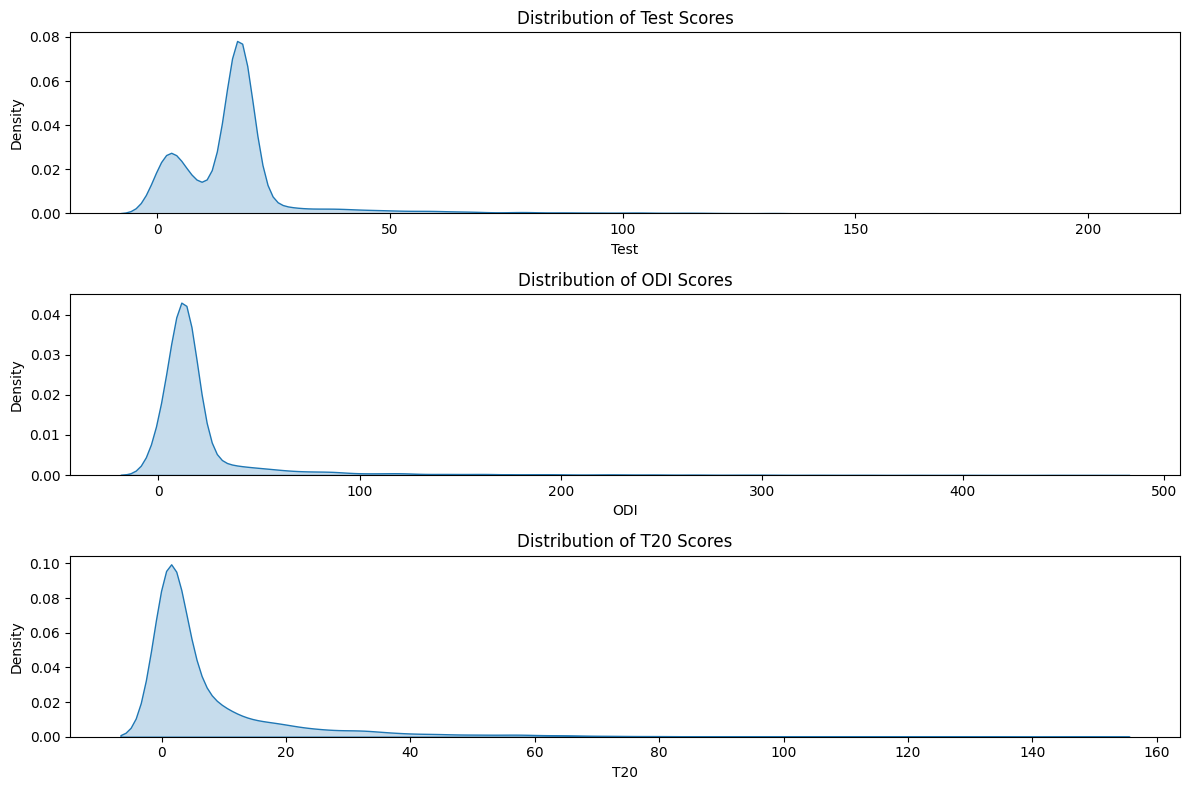

In [16]:
# Visualize the distribution of Test, ODI, and T20 scores using KDE plots
plt.figure(figsize=(12, 8))

# Test scores
plt.subplot(3, 1, 1)
sns.kdeplot(cricketers_df['Test'], fill=True)
plt.title('Distribution of Test Scores')

# ODI scores
plt.subplot(3, 1, 2)
sns.kdeplot(cricketers_df['ODI'], fill=True)
plt.title('Distribution of ODI Scores')

# T20 scores
plt.subplot(3, 1, 3)
sns.kdeplot(cricketers_df['T20'], fill=True)
plt.title('Distribution of T20 Scores')

plt.tight_layout()
plt.show()


**Who are the top 10 players with the highest Test scores, and what countries do they belong to?**

In [17]:
# Identify the top 10 players with the highest Test scores
top_test_scorers = cricketers_df.nlargest(10, 'Test')[['Name', 'Country', 'Test']]

# Display the top 10 players with the highest Test scores and their countries
print(top_test_scorers)


               Name       Country   Test
6018  S R Tendulkar         India  200.0
336    J M Anderson       England  183.0
4727    R T Ponting     Australia  168.0
6500      S R Waugh     Australia  168.0
925     S C J Broad       England  167.0
2876     J H Kallis  South Africa  166.0
1103  S Chanderpaul   West Indies  164.0
1583       R Dravid         India  164.0
1246       A N Cook       England  161.0
857      A R Border     Australia  156.0


**Which country has the highest average ODI scores among its players?**

In [18]:
# Calculate the average ODI scores for each country
average_odi_scores_by_country = cricketers_df.groupby('Country')['ODI'].mean().reset_index()

# Identify the country with the highest average ODI scores
highest_avg_odi_country = average_odi_scores_by_country.nlargest(1, 'ODI')

# Display the country with the highest average ODI scores
print(f"The country with the highest average ODI scores is {highest_avg_odi_country['Country'].values[0]}.")


The country with the highest average ODI scores is Sri Lanka.


**How many players from each country have participated in T20 matches?**

In [19]:
# Count the number of players from each country who participated in T20 matches
t20_participation_counts = cricketers_df[cricketers_df['T20'] > 0]['Country'].value_counts()

# Display the count of players from each country who participated in T20 matches
print(t20_participation_counts)


Country
England         759
Australia       529
South Africa    417
India           399
West Indies     393
               ... 
Myanmar          13
Peru             13
St Helena        12
Costa Rica       12
Mongolia         11
Name: count, Length: 103, dtype: int64


**What is the distribution of Test scores for players from India?**

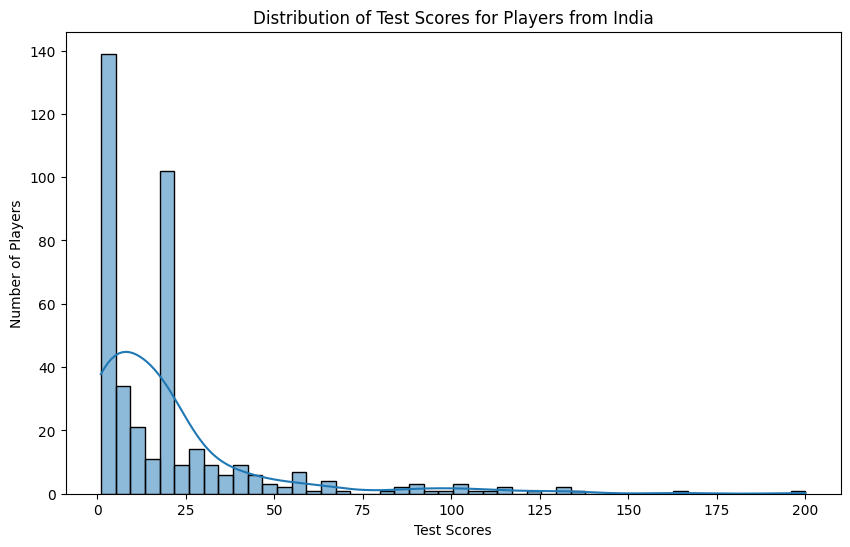

In [20]:
# Visualize the distribution of Test scores for players from India using a histogram
plt.figure(figsize=(10, 6))
sns.histplot(cricketers_df[cricketers_df['Country'] == 'India']['Test'], kde=True)
plt.title('Distribution of Test Scores for Players from India')
plt.xlabel('Test Scores')
plt.ylabel('Number of Players')
plt.show()


**Which players have represented multiple countries in their cricket career?**

In [21]:
# Identify players who have represented multiple countries
players_multiple_countries = cricketers_df.groupby('Name')['Country'].nunique()
players_multiple_countries = players_multiple_countries[players_multiple_countries > 1].index.tolist()

# Display the players who have represented multiple countries
print(f"Players who have represented multiple countries: {', '.join(players_multiple_countries)}")


Players who have represented multiple countries: A Mehmood, A Patel, Abdul Rahman, Abdul Shakoor, Aftab Ahmed, Ahmed Hassan, Ali Raza, Amir Hamza, Ashfaq Ahmed, Asif Iqbal, B S Sandhu, D Johnson, D R Smith, F J Cameron, G J Thompson, G Miller, Gagandeep Singh, Ihsanullah, Imran Butt, Imran Haider, Imran Khan, J Butler, J D Nel, J M Patel, J W Martin, J W Wilson, Junaid Khan, Junaid Siddique, Khurram Shahzad, M J Smith, M M Patel, M Patel, Manpreet Singh, Mohammad Aslam, Mohammad Shahzad, Mohsin Khan, P Kumar, R A Young, R B Patel, R Sharma, Rahat Ali, Rakibul Hasan, Rashid Khan, Riaz Afridi, S C Williams, S G Shinde, S Goud, S Kumar, S P Jones, S Singh, Saeed Ahmed, Shahid Afridi, Shahid Mahmood, Shakeel Ahmed, Shoaib Khan, Sultan Ahmed, W Watson, Waqar Khan, Yasir Ali, Ziaur Rahman, Zulqarnain Haider


**How many players from Australia have played in both ODI and T20 formats?**

In [22]:
# Count the number of players from Australia who have played in both ODI and T20 formats
australia_odi_t20_players_count = cricketers_df[(cricketers_df['Country'] == 'Australia') & (cricketers_df['ODI'] > 0) & (cricketers_df['T20'] > 0)].shape[0]

# Display the count of players from Australia who have played in both ODI and T20 formats
print(f"The number of players from Australia who have played in both ODI and T20 formats is {australia_odi_t20_players_count}.")


The number of players from Australia who have played in both ODI and T20 formats is 529.


**Can we visualize the top 10 players with the highest average Test scores?**

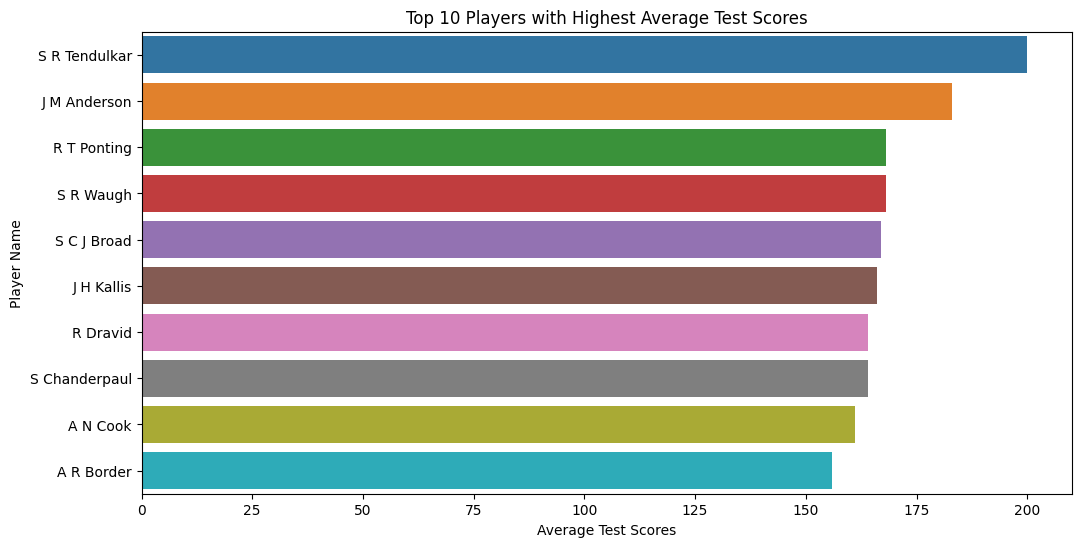

In [23]:
# Identify the top 10 players with the highest average Test scores
top_avg_test_scorers = cricketers_df.groupby('Name')['Test'].mean().nlargest(10).reset_index()

# Visualize the top 10 players with the highest average Test scores using a bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x='Test', y='Name', data=top_avg_test_scorers)
plt.title('Top 10 Players with Highest Average Test Scores')
plt.xlabel('Average Test Scores')
plt.ylabel('Player Name')
plt.show()


**How does the distribution of ODI scores vary among the top 10 players with the highest ODI scores?**

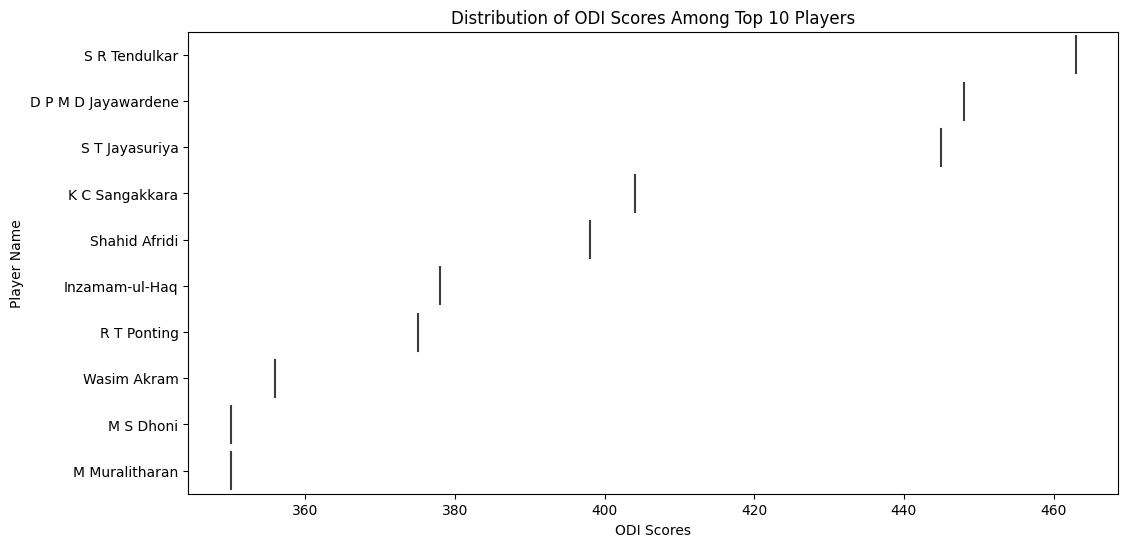

In [24]:
# Identify the top 10 players with the highest ODI scores
top_odi_scorers = cricketers_df.nlargest(10, 'ODI')[['Name', 'ODI']]

# Visualize the distribution of ODI scores among the top 10 players using a violin plot
plt.figure(figsize=(12, 6))
sns.violinplot(x='ODI', y='Name', data=top_odi_scorers)
plt.title('Distribution of ODI Scores Among Top 10 Players')
plt.xlabel('ODI Scores')
plt.ylabel('Player Name')
plt.show()


**How can we visualize the T20 scores for the top 5 players with the highest T20 scores?**

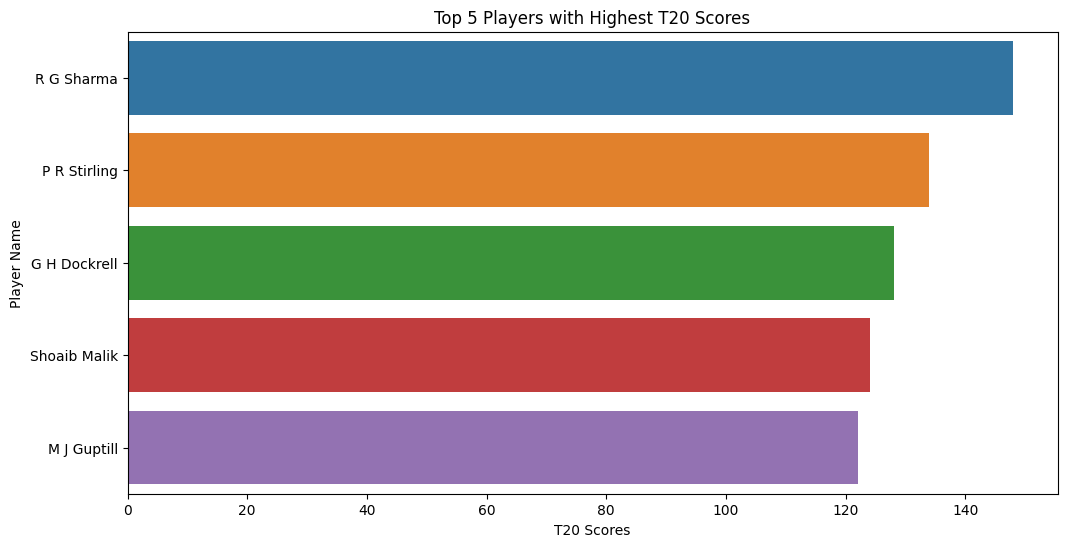

In [25]:
# Identify the top 5 players with the highest T20 scores
top_t20_scorers = cricketers_df.nlargest(5, 'T20')[['Name', 'T20']]

# Visualize the T20 scores for the top 5 players using a horizontal bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x='T20', y='Name', data=top_t20_scorers)
plt.title('Top 5 Players with Highest T20 Scores')
plt.xlabel('T20 Scores')
plt.ylabel('Player Name')
plt.show()
